Hypertension and various parameters exploration:  

To do:  

Import packages  

Import the NHANES_analysis_data. This has the activity, mortality data used in the main reference: Organizing and analyzing the activity data in NHANES. The activity data is from 2003 - 2006 (double check years from the documentation)  


Get the list of subjects into a separate files. This list will be used to get the specific data from any of the other data files. This list represents the subjects with mortality data and activity data, the latter of which has been extracted in a complex precess from very large accelerometer data files.  




In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from nhanes.utils import get_nhanes_year_code_dict, get_source_code_from_filepath
from nhanes.utils import EmptySectionError, make_long_variable_name
from nhanes.utils import get_vars_to_keep, get_datasets




# Load the file
file_path = '../data/NHANES_analysis_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and the column names to understand its structure
data.head(), data.columns



(   Unnamed: 0   SEQN  PAXCAL  PAXSTAT  WEEKDAY  SDDSRVYR  eligstat  mortstat  \
 0          29  21009       1        1        1         3         1         0   
 1          36  21010       1        1        7         3         1         0   
 2          43  21012       1        1        5         3         1         0   
 3          57  21015       1        1        5         3         1         1   
 4          85  21019       1        1        1         3         1         0   
 
    causeavl  permth_exm  ...        si3       mi4        si4        mi5  \
 0       NaN          91  ...  10.111268 -5.672251   4.758967  -7.065432   
 1       NaN         102  ...  15.838752  4.406696  14.108764   4.135414   
 2       NaN          89  ...  16.225173 -0.181256  15.776060 -14.312063   
 3       1.0          24  ...   7.191713 -2.059667  13.697082  -3.361531   
 4       NaN         100  ...  14.528884  4.161097   9.919867  -5.008378   
 
          si5       mi6        si6      sPC1      sPC5

In [5]:
# Set the path to the directory containing the NHANES data files
# data_dir = '/path/to/data/files'
data_dir =  '../data/raw_data/2003-2004a'
# Get a list of all NHANES data files in the data directory
data_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
print(data_files)

['ACQ_C.csv', 'ALQ_C.csv', 'BIX_C.csv', 'BMX_C.csv', 'BPQ_C.csv', 'BPX_C.csv', 'CDQ_C.csv', 'CIQDEP_C.csv', 'CIQGAD_C.csv', 'CIQPAN_C.csv', 'CVX_C.csv', 'DBQ_C.csv', 'DEMO_C.csv', 'DIQ_C.csv', 'DUQ_C.csv', 'DXXAG_C.csv', 'dxx_c.csv', 'HSQ_C.csv', 'HUQ_C.csv', 'KIQ_P_C.csv', 'KIQ_U_C.csv', 'L11_C.csv', 'L13AM_C.csv', 'L13_C.csv', 'L16_C.csv', 'L40_C.csv', 'LEXAB_C.csv', 'LEXPN_C.csv', 'MCQ_C.csv', 'OCQ_C.csv', 'OHQ_C.csv', 'OHXADD_C.csv', 'OHXDEN_C (1).csv', 'OHXDEN_C.csv', 'OHXPRL_C.csv', 'OHXPRU_C.csv', 'OHXREF_C.csv', 'OSQ_C.csv', 'PAQIAF_C.csv', 'PAQ_C.csv', 'PFQ_C.csv', 'RDQ_C.csv', 'RXQANA_C.csv', 'RXQ_DRUG.csv', 'RXQ_RX_C.csv', 'SMQ_C.csv', 'SSFA_C.csv', 'SSTROP_A.csv', 'VIX_C.csv', 'WHQ_C.csv']


In [6]:
# Set the path to the directory containing the NHANES data files
# data_dir = '/path/to/data/files'
data_dir =  '../data/raw_data/2005-2006'
# Get a list of all NHANES data files in the data directory
data_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
print(data_files)

['ACQ_D.csv', 'ALQ_D.csv', 'BIOPRO_D.csv', 'BMX_D.csv', 'BPQ_D.csv', 'BPX_D.csv', 'CBC_D.csv', 'CDQ_D.csv', 'CRP_D.csv', 'DBQ_D.csv', 'DEMO_D.csv', 'DIQ_D.csv', 'DPQ_D.csv', 'DR1TOT_D.csv', 'DR2TOT_D.csv', 'DUQ_D.csv', 'DXXAG_D.csv', 'dxx_c.csv', 'dxx_c_s.csv', 'dxx_d.csv', 'dxx_d_s.csv', 'EPH_D.csv', 'EPP_D.csv', 'FERTIN_D.csv', 'GHB_D.csv', 'HDL_D.csv', 'HIQ_D.csv', 'HSQ_D.csv', 'HUQ_D.csv', 'KIQ_U_D.csv', 'MCQ_D.csv', 'OCQ_D.csv', 'OHQ_D.csv', 'OHX_D.csv', 'OSQ_D.csv', 'PAQIAF_D.csv', 'PAQ_D.csv', 'PBCD_D.csv', 'PFQ_D.csv', 'RDQ_D.csv', 'RXQ_DRUG.csv', 'RXQ_RX_D.csv', 'SLQ_D.csv', 'SMQRTU_D.csv', 'SMQ_D.csv', 'TCHOL_D.csv', 'TRIGLY_D.csv', 'VIQ_D.csv', 'VIX_D.csv', 'WHQ_D.csv']


In [7]:
data.head(), data.columns

(   Unnamed: 0   SEQN  PAXCAL  PAXSTAT  WEEKDAY  SDDSRVYR  eligstat  mortstat  \
 0          29  21009       1        1        1         3         1         0   
 1          36  21010       1        1        7         3         1         0   
 2          43  21012       1        1        5         3         1         0   
 3          57  21015       1        1        5         3         1         1   
 4          85  21019       1        1        1         3         1         0   
 
    causeavl  permth_exm  ...        si3       mi4        si4        mi5  \
 0       NaN          91  ...  10.111268 -5.672251   4.758967  -7.065432   
 1       NaN         102  ...  15.838752  4.406696  14.108764   4.135414   
 2       NaN          89  ...  16.225173 -0.181256  15.776060 -14.312063   
 3       1.0          24  ...   7.191713 -2.059667  13.697082  -3.361531   
 4       NaN         100  ...  14.528884  4.161097   9.919867  -5.008378   
 
          si5       mi6        si6      sPC1      sPC5

In [8]:
gender_distribution = data['Gender'].value_counts()
print(gender_distribution)

Gender
Male      1611
Female    1587
Name: count, dtype: int64


In [9]:
# Distribution of categorical variables
race_distribution = data['Race'].value_counts()
print(race_distribution)

Race
White               1862
Black                601
Mexican American     572
Other                102
Other Hispanic        61
Name: count, dtype: int64


In [11]:

# Check for missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)

Unnamed: 0    0
SEQN          0
PAXCAL        0
PAXSTAT       0
WEEKDAY       0
             ..
mi6           0
si6           0
sPC1          0
sPC5          0
sPC6          0
Length: 81, dtype: int64


In [13]:
# Extract only numeric columns from the data
numeric_data = data.select_dtypes(include=[np.number])

In [15]:

# Descriptive statistics for numeric columns
desc_stats = numeric_data.describe()
print(desc_stats)

          Unnamed: 0          SEQN  PAXCAL  PAXSTAT      WEEKDAY     SDDSRVYR  \
count    3198.000000   3198.000000  3198.0   3198.0  3198.000000  3198.000000   
mean    49371.141964  30919.298624     1.0      1.0     3.679174     3.474984   
std     29749.605212   5939.084536     0.0      0.0     2.128558     0.499452   
min        29.000000  21009.000000     1.0      1.0     1.000000     3.000000   
25%     23643.500000  25782.000000     1.0      1.0     2.000000     3.000000   
50%     47422.500000  30529.500000     1.0      1.0     3.000000     3.000000   
75%     75466.250000  36118.750000     1.0      1.0     6.000000     4.000000   
max    102376.000000  41468.000000     1.0      1.0     7.000000     4.000000   

       eligstat     mortstat    causeavl   permth_exm  ...          si3  \
count    3198.0  3198.000000  500.000000  3198.000000  ...  3198.000000   
mean        1.0     0.156348    0.998000    77.272670  ...    11.665560   
std         0.0     0.363241    0.044721    2

In [16]:

# Distribution of categorical variables
race_distribution = data['Race'].value_counts()
gender_distribution = data['Gender'].value_counts()
sleep_apnea_distribution = data['hyperten_mcod'].value_counts()

# Correlation matrix
correlation_matrix = numeric_data.corr()

desc_stats


,Unnamed: 0,SEQN,PAXCAL,PAXSTAT,WEEKDAY,SDDSRVYR,eligstat,mortstat,causeavl,permth_exm,...,si3,mi4,si4,mi5,si5,mi6,si6,sPC1,sPC5,sPC6
count,3198.000000,3198.000000,3198.0,3198.0,3198.000000,3198.000000,3198.0,3198.000000,500.000000,3198.000000,...,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000,3198.000000
mean,49371.141964,30919.298624,1.0,1.0,3.679174,3.474984,1.0,0.156348,0.998000,77.272670,...,11.665560,-0.222842,11.307798,0.004076,10.121201,0.087158,9.727031,2.043132,2.289681,2.539408
std,29749.605212,5939.084536,0.0,0.0,2.128558,0.499452,0.0,0.363241,0.044721,20.902774,...,5.696092,8.457673,4.475771,7.956348,4.247787,6.676252,3.764082,1.000000,1.000000,1.000000
min,29.000000,21009.000000,1.0,1.0,1.000000,3.000000,1.0,0.000000,0.000000,1.000000,...,0.497092,-37.537116,0.880774,-42.814706,1.050055,-29.205554,0.493105,0.114740,0.118477,0.223690
25%,23643.500000,25782.000000,1.0,1.0,2.000000,3.000000,1.0,0.000000,1.000000,66.000000,...,7.646301,-5.445106,8.050198,-4.545309,7.037252,-4.133943,6.991985,1.326657,1.578341,1.828361
50%,47422.500000,30529.500000,1.0,1.0,3.000000,3.000000,1.0,0.000000,1.000000,80.000000,...,10.742802,0.205485,10.837037,0.553449,9.566671,0.048723,9.411755,1.866755,2.117929,2.421265
75%,75466.250000,36118.750000,1.0,1.0,6.000000,4.000000,1.0,0.000000,1.000000,92.000000,...,14.659543,5.182739,13.881407,5.180536,12.453932,4.159144,11.982522,2.519429,2.851911,3.139233
max,102376.000000,41468.000000,1.0,1.0,7.000000,4.000000,1.0,1.000000,1.000000,107.000000,...,47.108291,32.009470,31.643878,32.593000,39.060541,28.162747,27.628499,8.373436,8.965640,7.526146


In [17]:
race_distribution

Race
White               1862
Black                601
Mexican American     572
Other                102
Other Hispanic        61
Name: count, dtype: int64

In [18]:
gender_distribution

Gender
Male      1611
Female    1587
Name: count, dtype: int64

In [19]:
correlation_matrix

,Unnamed: 0,SEQN,PAXCAL,PAXSTAT,WEEKDAY,SDDSRVYR,eligstat,mortstat,causeavl,permth_exm,...,si3,mi4,si4,mi5,si5,mi6,si6,sPC1,sPC5,sPC6
Unnamed: 0,1.000000,0.999990,NaN,NaN,-0.014634,0.869527,NaN,-0.065932,0.025723,-0.416651,...,0.020429,-0.035820,0.041209,-0.017689,-0.000327,0.032428,-0.009895,0.054904,0.004705,-0.005110
SEQN,0.999990,1.000000,NaN,NaN,-0.014501,0.869202,NaN,-0.065865,0.025538,-0.416532,...,0.020289,-0.035765,0.041237,-0.017626,-0.000384,0.032301,-0.009912,0.054827,0.004629,-0.005158
PAXCAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAXSTAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WEEKDAY,-0.014634,-0.014501,NaN,NaN,1.000000,-0.026088,NaN,0.035768,-0.045781,-0.031975,...,-0.073421,0.092735,-0.014631,0.021158,-0.039878,-0.030959,0.008455,-0.075287,-0.026622,0.005867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mi6,0.032428,0.032301,NaN,NaN,-0.030959,0.044786,NaN,-0.029774,-0.000438,0.002024,...,0.074031,-0.133633,0.030222,0.053943,-0.001245,1.000000,0.034207,0.002006,-0.024923,0.029159
si6,-0.009895,-0.009912,NaN,NaN,0.008455,-0.010273,NaN,-0.149163,-0.005734,0.131263,...,0.272336,0.014471,0.245428,-0.038476,0.235533,0.034207,1.000000,0.180026,0.202309,0.868338
sPC1,0.054904,0.054827,NaN,NaN,-0.075287,0.061365,NaN,-0.092147,0.010153,0.043131,...,0.347595,-0.082409,0.243793,-0.201165,0.251435,0.002006,0.180026,1.000000,0.251844,0.211466
sPC5,0.004705,0.004629,NaN,NaN,-0.026622,0.007538,NaN,-0.129348,-0.080862,0.101710,...,0.365797,-0.085521,0.243052,-0.128905,0.774823,-0.024923,0.202309,0.251844,1.000000,0.231565


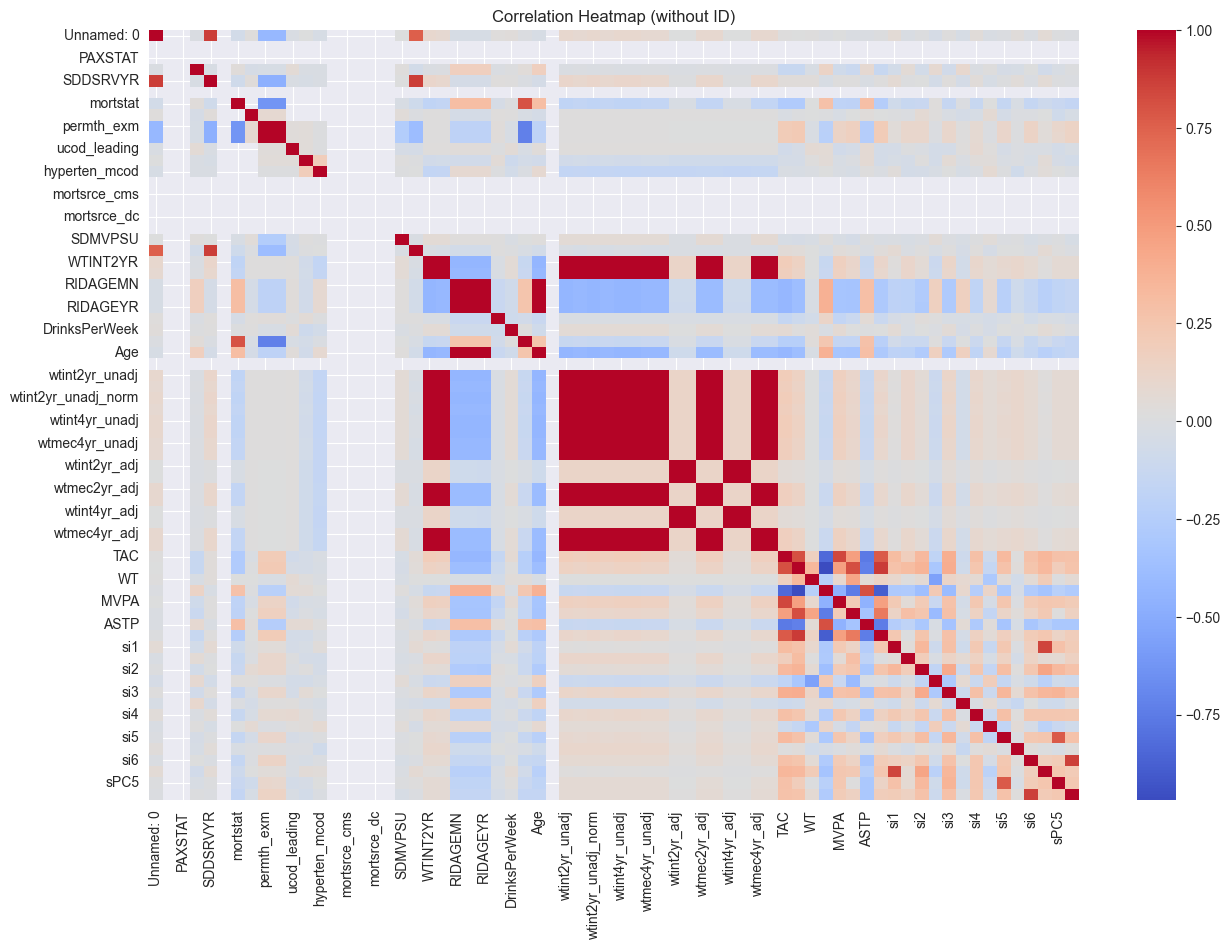

In [21]:
# Extract only numeric columns from the data
numeric_data = data.select_dtypes(include=[np.number])

# Drop the 'ID' column for the correlation matrix
correlation_matrix_no_id = numeric_data.drop('SEQN', axis=1).corr()

# Heatmap of the new correlation matrix without the ID column
plt.figure(figsize=(15, 10))
heatmap_no_id = sns.heatmap(correlation_matrix_no_id, annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap (without ID)')
plt.show()

Get the subjects list from the mortality-HTN-Activity file to use to get data from other data files.

In [23]:
# Get the subjects list from the mortality-HTN-Activity file to use to get data from other data files.
import pandas as pd

# Read the CSV file
file_path = "../data/NHANES_analysis_data.csv"
df = pd.read_csv(file_path)

# Extract the SEQN column
seqn_values = df['SEQN']

print("First few SEQN values:")
print(seqn_values.head())

print(f"\nTotal number of SEQN values: {len(seqn_values)}")

# Save these values to a new file:
output_file = '../data/seqn_fileMain.csv'
seqn_values.to_csv(output_file, index=False)
print(f"\nSEQN values have been saved to '{output_file}'")

# Basic statistics of the SEQN values:
print("\n Info SEQN values:")
print(seqn_values.info())

First few SEQN values:
0    21009
1    21010
2    21012
3    21015
4    21019
Name: SEQN, dtype: int64

Total number of SEQN values: 3198

SEQN values have been saved to '../data/seqn_fileMain.csv'

 Info SEQN values:
<class 'pandas.core.series.Series'>
RangeIndex: 3198 entries, 0 to 3197
Series name: SEQN
Non-Null Count  Dtype
--------------  -----
3198 non-null   int64
dtypes: int64(1)
memory usage: 25.1 KB
None
